##### Link datasource: https://www.kaggle.com/code/mineorn/mobile-phones-data/data

# Bài 1: Cài đặt phương pháp Bootstrap

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import plotly.express as px
import math
sns.set(rc={"figure.figsize":(15,8)})

In [5]:
# Đọc dữ liệu truyền vào
path = 'phones_data.csv'
df = pd.read_csv(path) 
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [6]:
def bootstrap(n, M, x):
  resampled_stat=[] #mảng chứa các mẫu được tính toán 
  for i in range(M):
    y = random.sample(df['best_price'].tolist(),n)
    avg= np.mean(y)
    resampled_stat.append(avg)
  sns.histplot(resampled_stat, kde= True, stat= "probability")
  #Tính khoảng tin cậy
  MucYNghia =  (100-x)/2/100
  ViTriCanDuoi = math.floor(MucYNghia*M)
  CanDuoi = np.sort(resampled_stat)[ViTriCanDuoi]
  ViTriCanTren = math.floor(1-MucYNghia*M)
  CanTren = np.sort(resampled_stat)[ViTriCanTren]
  plt.plot([CanTren,CanTren],[0,0.1],'-r')
  plt.plot([CanDuoi,CanDuoi],[0,0.1],'-r')
  print( "Dãi tin cậy từ: ",CanDuoi ,"đến", CanTren)



Dãi tin cậy từ:  7359.5875 đến 8571.53


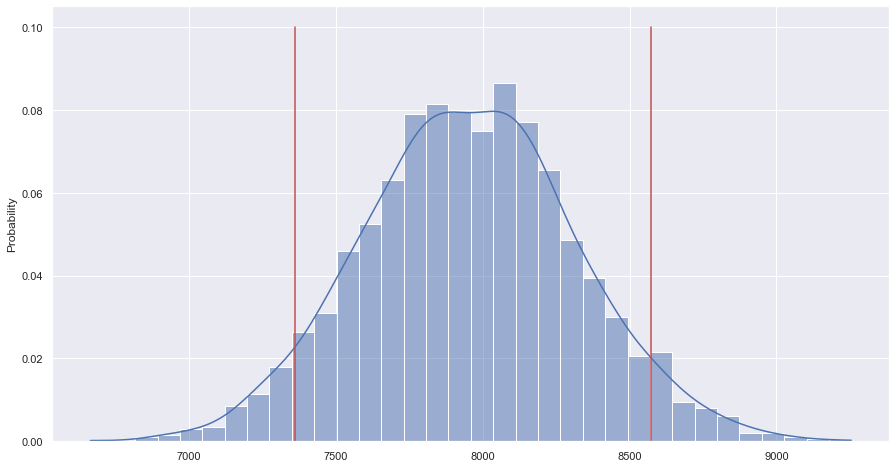

In [7]:
bootstrap(400,2000,90)

# Bài 2

## Xử lý dữ liệu

Các cột dữ liệu trong data

In [8]:
list(df.columns)

['Unnamed: 0',
 'brand_name',
 'model_name',
 'os',
 'popularity',
 'best_price',
 'lowest_price',
 'highest_price',
 'sellers_amount',
 'screen_size',
 'memory_size',
 'battery_size',
 'release_date']

Sử dụng hàm isna() để phát hiện các dữ liệu bị thiếu trong Dataframe

In [9]:
df.isna().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

### Xem xét dữ liệu bị thiếu

#### Phần os : Hệ điều hành của điện thoại. 

Do không thể dự đoán được hệ điều hành nên sẽ thay thế các giá trị còn thiếu là "Other"

In [10]:
df[df.os.isna()]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
12,12,Nokia,105 DS 2019 Pink (16KIGP01A01),NaN,18,583.0,528.0,649.0,28,1.77,0.004,800.0,10-2019
13,13,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,262,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
14,14,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),NaN,274,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
15,15,Nokia,105 Dual Sim New Black (A00028315),NaN,507,552.0,499.0,606.0,2,1.80,0.004,800.0,9-2017
16,16,Nokia,105 Single Sim 2019 Black (16KIGB01A13),NaN,805,536.0,449.0,642.0,31,1.77,NaN,800.0,11-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1115,Nomi,i284 Black,NaN,702,584.0,504.0,763.0,35,2.80,NaN,1750.0,1-2020
1116,1116,Nomi,i284 Red,NaN,140,574.0,529.0,695.0,32,2.80,NaN,1750.0,1-2020
1117,1117,Nomi,i284 Violet-blue,NaN,613,580.0,528.0,709.0,34,2.80,NaN,1750.0,1-2020
1118,1118,Nomi,i285 X-Treme Black-Yellow,NaN,381,1071.0,999.0,1144.0,2,2.80,NaN,2500.0,8-2019


In [11]:
temp = df[df.os.isna()]
temp.os = temp.os.fillna('Other')
df[df.os.isna()] = temp

C:\Users\PC\AppData\Local\Temp\ipykernel_7568\3347854861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.os = temp.os.fillna('Other')


#### Phần lowest_price và highest_price

Do không dự đoán được giá tiền cao nhất và thấp nhất của sản phẩm nên gán hai giá trị đó bằng best_price của sản phẩm đó

In [9]:
temp = df[df.lowest_price.isna()]
temp.lowest_price = temp.best_price
temp.highest_price = temp.best_price
df[df.lowest_price.isna()] = temp

C:\Users\PC\AppData\Local\Temp\ipykernel_9888\3186915712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.lowest_price = temp.best_price
C:\Users\PC\AppData\Local\Temp\ipykernel_9888\3186915712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.highest_price = temp.best_price


#### Phần memory_size


In [10]:
df[df.memory_size.isna()]

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
13,13,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),Other,262,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
14,14,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),Other,274,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
16,16,Nokia,105 Single Sim 2019 Black (16KIGB01A13),Other,805,536.0,449.0,642.0,31,1.77,NaN,800.0,11-2019
17,17,Nokia,105 Single Sim 2019 Pink (16KIGP01A13),Other,692,547.0,496.0,709.0,35,1.77,NaN,800.0,11-2019
22,22,Nokia,106 New DS Grey (16NEBD01A02),Other,838,596.0,544.0,699.0,35,1.80,NaN,800.0,1-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,1115,Nomi,i284 Black,Other,702,584.0,504.0,763.0,35,2.80,NaN,1750.0,1-2020
1116,1116,Nomi,i284 Red,Other,140,574.0,529.0,695.0,32,2.80,NaN,1750.0,1-2020
1117,1117,Nomi,i284 Violet-blue,Other,613,580.0,528.0,709.0,34,2.80,NaN,1750.0,1-2020
1118,1118,Nomi,i285 X-Treme Black-Yellow,Other,381,1071.0,999.0,1144.0,2,2.80,NaN,2500.0,8-2019


Có thể thấy số tiền cao nhất của chiếc điện thoại bị mất dữ liệu memory_size là 1558UAH (=1tr210VND). Với số tiền thấp như vậy thì không thể yêu cầu một chiếc điện thoại có bộ nhớ cao ( có thể là điện thoại nút bấm) nên sẽ thay thế các giá trị NaN là bằng 0

In [11]:
df[df.memory_size.isna()].best_price.max()

1558.0

In [12]:
df['memory_size'] = df['memory_size'].replace(np.nan, 0)

### Hệ điều hành được sử dụng phổ biến

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

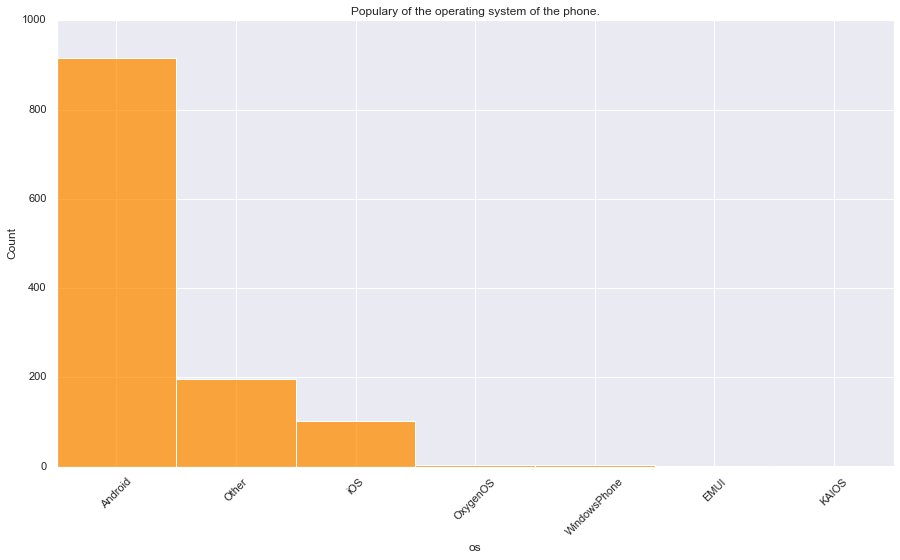

In [13]:
sns.histplot(df.os, discrete=True , color='darkorange')
plt.title('Populary of the operating system of the phone.')
plt.xticks(rotation = 45)

Kiểm tra lại đã plot lên đúng chưa

In [14]:
df['os'].value_counts().sort_values()

KAIOS             1
EMUI              2
OxygenOS          3
WindowsPhone      3
iOS             103
Other           197
Android         915
Name: os, dtype: int64

### Hãng điện thoại(brand_name) nào có nhiều người bán nhất (sellers_amount)


In [15]:
sellers_value = df.groupby('brand_name').sum()['sellers_amount'].sort_values()
brand_value = df['brand_name']

#### Mặc dù Android là hệ điều hành được sử dụng phổ biến nhất nhưng Iphone lại là hãng điện thoại có nhiều người bán hơn

<AxesSubplot:title={'center':'The amount of sellers, who sale this phone'}, xlabel='Os', ylabel='Seller amount'>

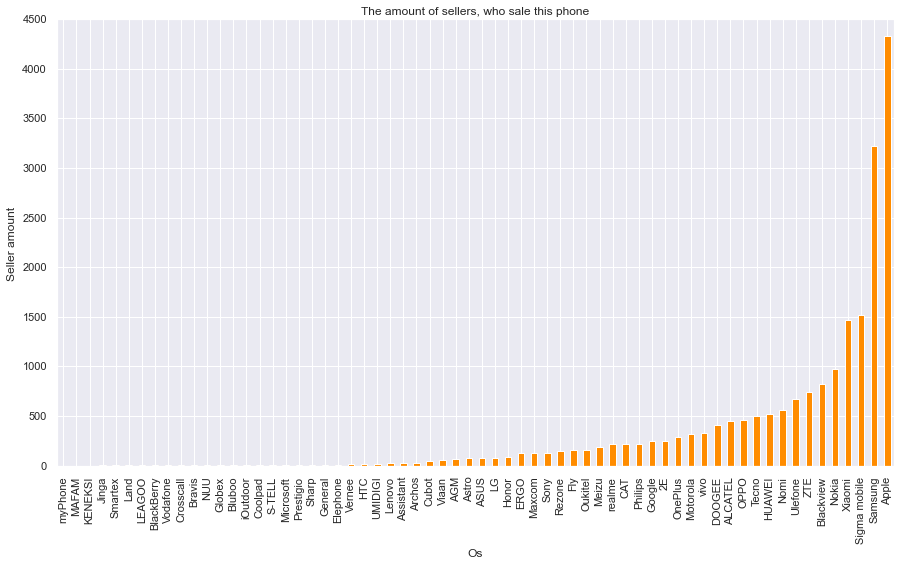

In [17]:
sellers_value.plot(kind='bar',title='The amount of sellers, who sale this phone', ylabel='Seller amount', xlabel='Os', color='darkorange')

### Mối liên hệ của giá cả (best_price) và bộ nhớ (memory_size)
 

#### Giá trị của điện thoại và giá trị của bộ nhớ có mối trương quan cao ,điện thoại càng có nhiều bộ nhớ thì càng đắt vì dung lượng bộ nhớ ảnh hưởng đến giá cả.

<AxesSubplot:xlabel='memory_size', ylabel='best_price'>

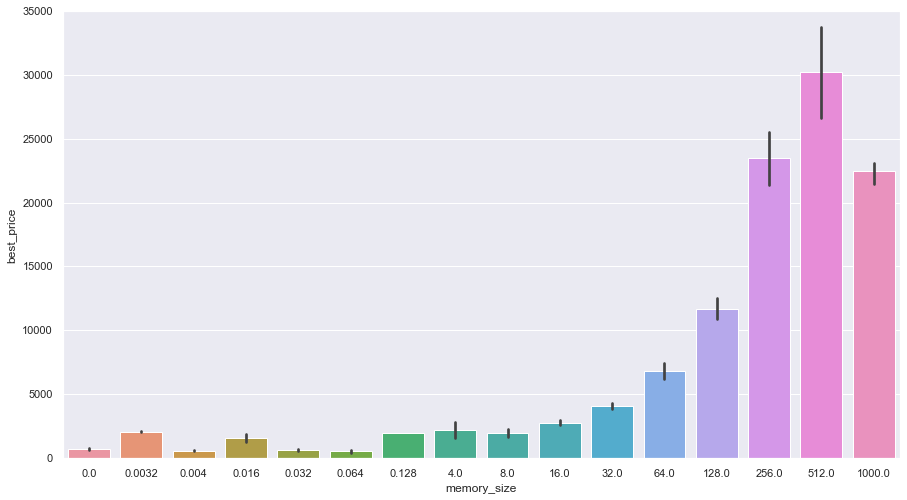

In [18]:
sns.barplot(x='memory_size',y='best_price',data=df)

Trong dataset chỉ có 3 mẫu điện thoại của Samsung có memorysize là 1000GB nhưng giá thấp hơn những điện thoại 512GB

In [19]:
(df[df['memory_size']==1000])

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
482,482,Samsung,Galaxy S10+ SM-G975 DS 1TB Black (SM-G975FCKH),Android,847,22932.0,20995.0,47292.0,22,6.4,1000.0,4000.0,2-2019
483,483,Samsung,Galaxy S10+ SM-G975 DS 1TB Ceramic White (SM-G...,Android,795,23137.0,20995.0,47292.0,22,6.4,1000.0,4000.0,2-2019
490,490,Samsung,Galaxy S10+ SM-G9750 DS 1TB Black,Android,66,21454.0,20954.0,21954.0,3,6.4,1000.0,4000.0,2-2019


### Năm có số lượng điện thoại được ra mắt nhiều nhất

Số lượng điện thoại được ra mắt tăng đều theo từng năm do một số yếu tố như nỗ lực chuyển đổi kỹ thuật số,sự phát triển của mạng di động, công nghệ AI..... 

In [120]:
df["Year"] = df["release_date"].apply(lambda c:c.split("-")[1]) #Thêm cột Year được cắt từ realease_date

In [135]:
total_phone = df.groupby('Year').count()['release_date']

<AxesSubplot:title={'center':'Number of phones released'}, xlabel='Year', ylabel='Number of phones '>

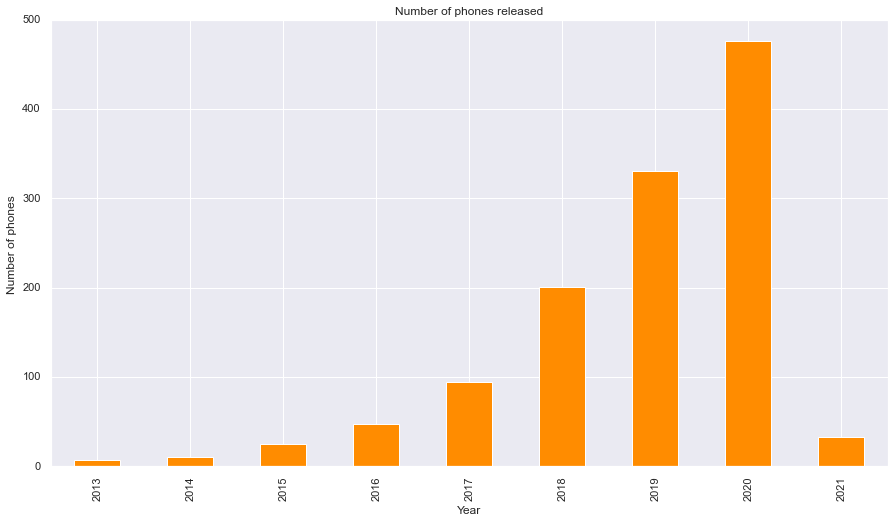

In [136]:
total_phone.plot(kind='bar',title='Number of phones released', ylabel='Number of phones ', xlabel='Year', color='darkorange')

### Mối liên hệ của giá cả (best_price) và kích cỡ pin (battery_size)

Theo quan sát có thể thấy giá cả và dung lượng pin không có mối tương quan chặt chẽ, khi bỏ ra một mức tiền cao cũng chưa chắc mua được một chiếc điện thoại có kích thước pin lớn, do kích thước của điện thoại còn phụ thuộc vào nhiều yếu tố khác

<AxesSubplot:title={'center':'Battery power by products'}, ylabel='battery_size'>

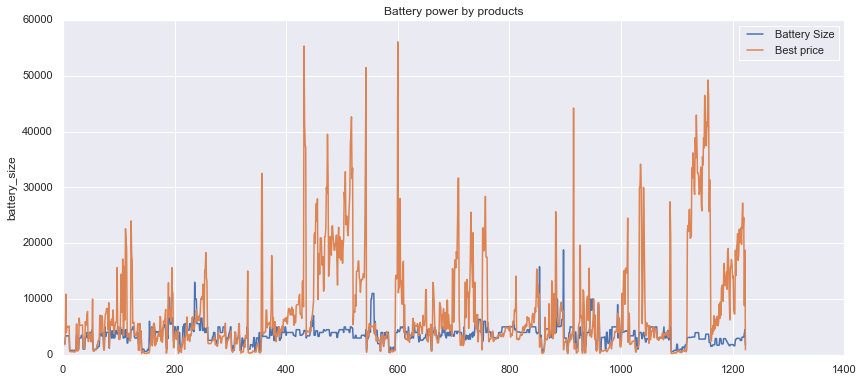

In [36]:
plt.figure(figsize=(14,6))
plt.title("Battery power by products")
sns.lineplot(data=df['battery_size'], label="Battery Size")
sns.lineplot(data=df['best_price'], label= "Best price")

### Mối liên hệ của giá cả (best_price) ,số lượng người bán (sellers_amount) và mức độ phổ biến(popularity)

Những chiếc điện thoại có giá cả thấp thì sẽ có độ phổ biến cao nhưng lại ít người bán, có thể vì lợi nhuận hoặc những chiếc điện thoại giá rẻ thì sẽ có ít tính năng không phù hợp nhu cầu người dùng. 


Biểu đồ thể hiện rõ những chiếc điện thoại có giá ở phân khúc tầm trung vẫn là sự lựa chọn tốt cho cả người mua và người dùng.

<AxesSubplot:xlabel='sellers_amount', ylabel='best_price'>

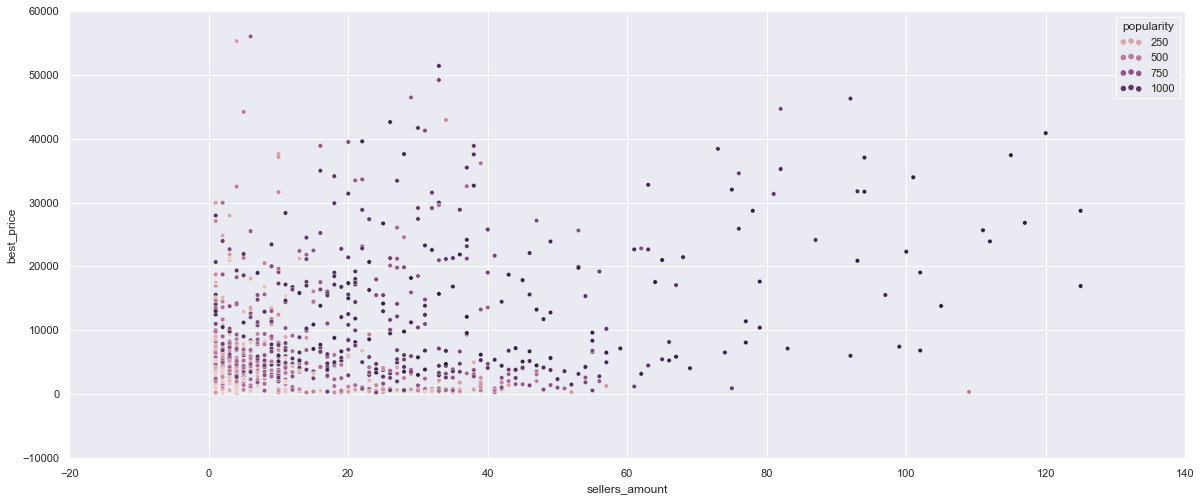

In [42]:
sns.scatterplot(x=df['sellers_amount'],
               y=df['best_price'], hue = df['popularity'])